## K-Nearest Neighbors Classification
The classification algorithm K-Nearest Neighbors or KNN is an algorithm for Supervised Learning that uses nearest neighnors to predict a data point. It uses K nearest points to determine its classification. It is also known as lazy learning algorithm and one of the simplest learning algorithm as its based on neighbors proximity.
Applications are 
1. Microbiology (for cell classification)  
2. Marketing (for customer segmentation)  
3. Credit Fraud Analysis 

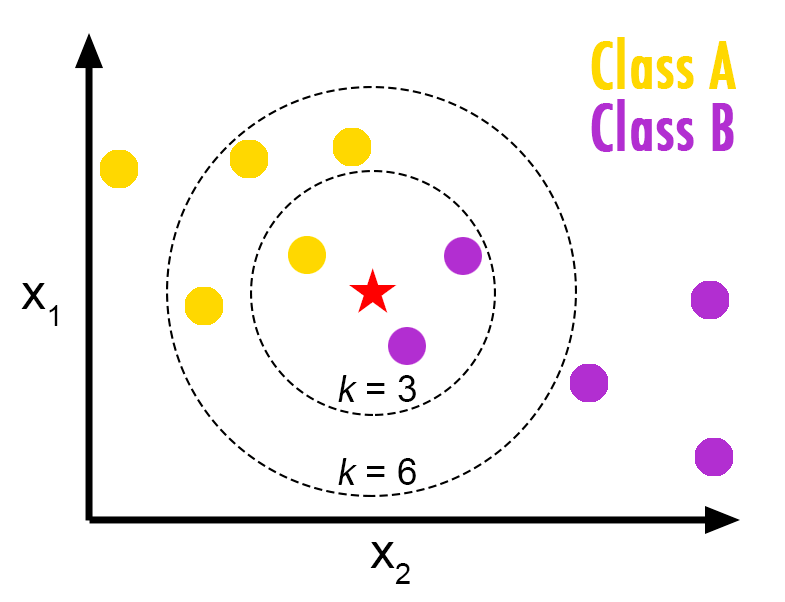

So in this case, we have data points of class A and class B. We want to predict what the star is. If we consider value of k as 3, we will obtain a prediction of class B, while if we condider value of k being 6 then we will obtain the prediction as of class B. Hence its necessary to consider the value of k.


In [1]:
#import libraries 
import itertools 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

#### About the dataset  

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.  

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.  

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service  

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

In [2]:
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


#### Data Visualization and Analysis


In [3]:
# Let us count each category 
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

##### 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A7096D4EB8>]],
      dtype=object)

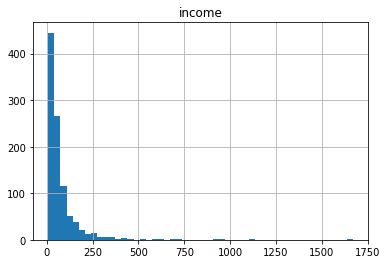

In [4]:
df.hist(column = 'income', bins = 50)

In [5]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [6]:
# for a better understanding lets rename the columns 
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ','retire','gender','reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [7]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

#### Normalize Data

Data Standardization gives data zero mean and unit variance.

In [8]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train Test Split  
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


#### Classification


In [10]:
from sklearn.neighbors import KNeighborsClassifier

#training 
k = 4
neighbor = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neighbor



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [11]:
#Predicting 
yhat = neighbor.predict(X_test)
yhat[0:5]


array([1, 1, 3, 2, 4], dtype=int64)

In [13]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = []
for n in range(1,Ks):
    neighbor = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neighbor.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

#### Plot model for different number of Neighbor 

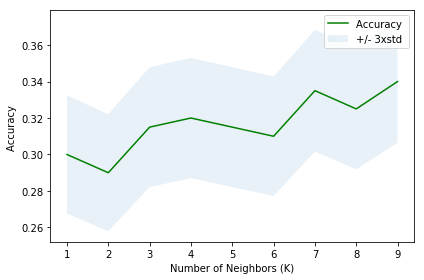

In [14]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [15]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


#### Accuracy Evaluation 
In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.



In [12]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighbor.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.5475
Test set Accuracy:  0.32


While building a knn model we choose mean of new instance when the problem is regression and mode when it is classification.
Most common method for choosing the value of K is the 'Elbow method'. We select a range of k. Minimum range is 1 till n number of data points. While plotting the graph of error vs the value of k in a range, we find that the lowest error value to be the one that should be ideal for choosing k. As illustrated in the figure.

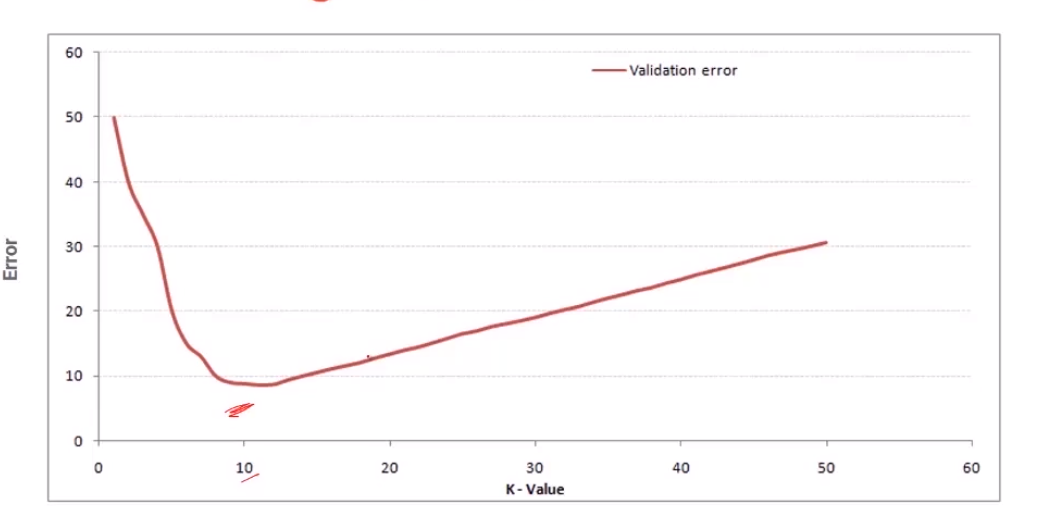

Calculating the distance  
Manhatten Distance : sum of absolute differences between two points accross all dimensions. It is not the shortest distance. 
Euclidean Distance : pythagoras theorem, square of third side is the square of adjacent squares.  
Minkowiski Distance : when you replace k = 1 and k = 2 in respective equations.  
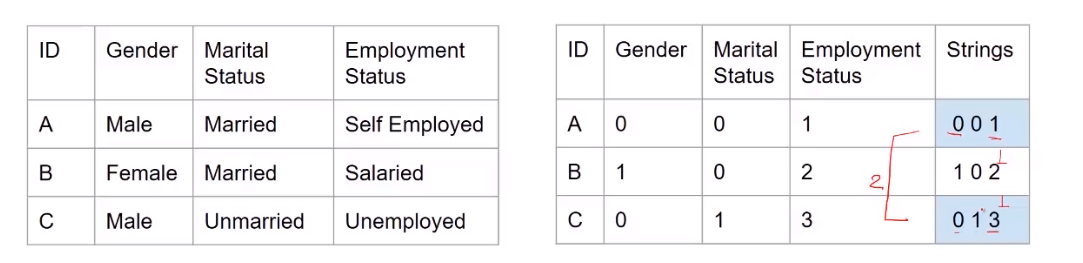  

Hamming Distance : total number of differences between two strings of identical length.   

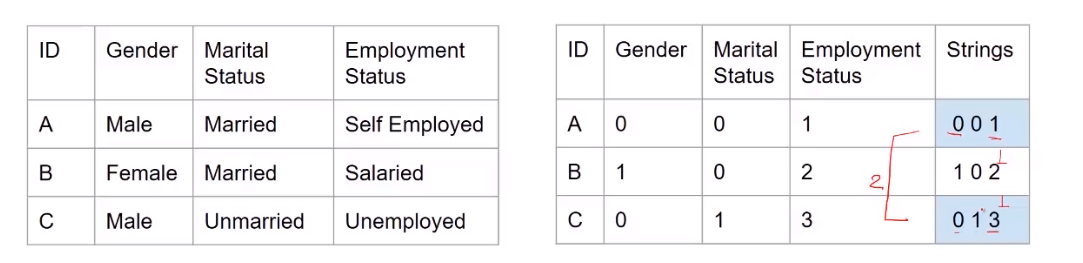

#### Drawbacks 
Fails when variables hae different scales.   
Relative distance between points changes.   
Leads to ambiguous interpretations.   